In [4]:
# Install CMGDB
!pip install --upgrade --no-deps CMGDB

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [5]:
import CMGDB

from scipy.integrate import solve_ivp
import matplotlib
import numpy as np
import time

In [6]:
# Time tau map
def tau_map(g, y0, tau):
  t_span = [0, tau]
  t = np.linspace(0, tau, 100)
  # Solve ODE
  method = 'RK45' # 'RK45', 'RK23', 'DOP853', 'Radau', 'BDF', 'LSODA'
  sol = solve_ivp(g, t_span, y0, method=method, t_eval=t, rtol=1e-8, atol=1e-8)
  # sol = solve_ivp(g, t_span, y0, method=method, t_eval=t)
  # Return last point
  y = sol.y[:, -1]
  return y

# Example 1

In [7]:
# Vector field
def g(t, x):
    return np.array([x[0] * (2 - x[0] - x[1]), x[1] * (4 * x[0] - x[0]**2 - 3)])

# Time tau map
def f(x):
    tau = 0.4
    return tau_map(g, x, tau)

# Define box map for f
def F(rect):
    return CMGDB.BoxMap(f, rect, padding=False)
    # return CMGDB.BoxMap(f, rect, padding=True)

In [8]:
subdiv_min = 16
subdiv_max = 25
subdiv_init = 10
subdiv_limit = 10000
lower_bounds = [-1, -2]
upper_bounds = [4, 2]

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit, lower_bounds, upper_bounds, F)

In [9]:
%%time
morse_graph, map_graph = CMGDB.ComputeConleyMorseGraph(model)
# morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: total: 24 s
Wall time: 24.3 s


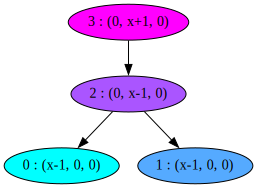

In [10]:
CMGDB.PlotMorseGraph(morse_graph, cmap=matplotlib.cm.cool)

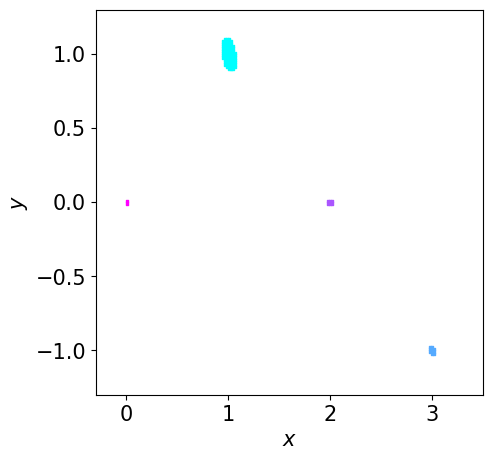

In [11]:
CMGDB.PlotMorseSets(morse_graph, cmap=matplotlib.cm.cool, fig_w=5, fig_h=5, xlim=[-0.3, 3.5], ylim=[-1.3, 1.3])

# Example 2 - Van der Pol

In [12]:
# Vector field
def vdp(t, y):
    mu = 1
    y1, y2 = y
    return [y2, mu * (1 - y1**2) * y2 - y1]

# Time tau map
def f(x):
    tau = 0.3
    return tau_map(vdp, x, tau)

# Define box map for f
def F(rect):
    return CMGDB.BoxMap(f, rect, padding=False)
    # return CMGDB.BoxMap(f, rect, padding=True)

In [13]:
subdiv_min = 14
subdiv_max = 16
subdiv_init = 8
subdiv_limit = 10000
lower_bounds = [-2.5, -4]
upper_bounds = [2.5, 4]

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit, lower_bounds, upper_bounds, F)

In [14]:
%%time
# morse_graph, map_graph = CMGDB.ComputeConleyMorseGraph(model)
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: total: 2min 30s
Wall time: 2min 31s


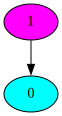

In [15]:
CMGDB.PlotMorseGraph(morse_graph, cmap=matplotlib.cm.cool)

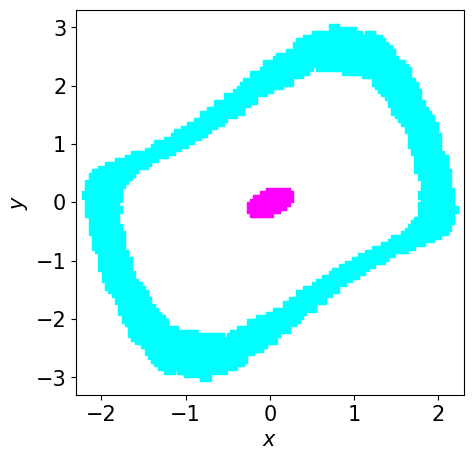

In [16]:
CMGDB.PlotMorseSets(morse_graph, cmap=matplotlib.cm.cool, fig_w=5, fig_h=5, xlim=[-2.3, 2.3], ylim=[-3.3, 3.3])

# Example 3 - Radial system

In [17]:
# Vector field
def g(t, u):
    r, theta = u
    return [-r * (r - 1.0) * (r - 2.0) * (r - 3.0), 1]

# Time tau map
def f(x):
    tau = 1.0
    a, b = x
    z = a + 1j * b
    r = np.abs(z)
    theta = np.angle(z)
    u0 = [r, theta]
    u = tau_map(g, u0, tau)
    r, theta = u
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return [x, y]

# Define box map for f
def F(rect):
    return CMGDB.BoxMap(f, rect, padding=False)
    # return CMGDB.BoxMap(f, rect, padding=True)

In [18]:
# Use the default values
# subdiv_init = 0
# subdiv_limit = 10000

subdiv_min = 8
subdiv_max = 8
# subdiv_init = 0
# subdiv_limit = 10000
lower_bounds = [-4, -4]
upper_bounds = [4, 4]

model = CMGDB.Model(subdiv_min, subdiv_max, lower_bounds, upper_bounds, F)
# model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit, lower_bounds, upper_bounds, F)

In [19]:
%%time
morse_graph, map_graph = CMGDB.ComputeConleyMorseGraph(model)
# morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: total: 11.2 s
Wall time: 11.3 s


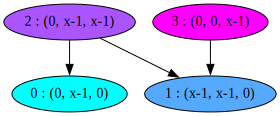

In [20]:
CMGDB.PlotMorseGraph(morse_graph, cmap=matplotlib.cm.cool)

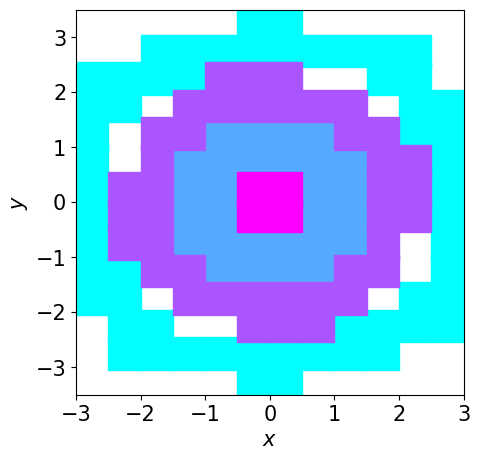

In [21]:
CMGDB.PlotMorseSets(morse_graph, cmap=matplotlib.cm.cool, fig_w=5, fig_h=5)

## Finer results

In [22]:
subdiv_min = 12
subdiv_max = 14
subdiv_init = 4
subdiv_limit = 10000
lower_bounds = [-4, -4]
upper_bounds = [4, 4]

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit, lower_bounds, upper_bounds, F)

In [23]:
%%time
morse_graph, map_graph = CMGDB.ComputeConleyMorseGraph(model)
# morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: total: 1min 14s
Wall time: 1min 14s


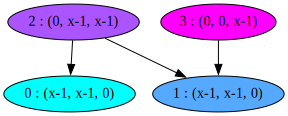

In [24]:
CMGDB.PlotMorseGraph(morse_graph, cmap=matplotlib.cm.cool)

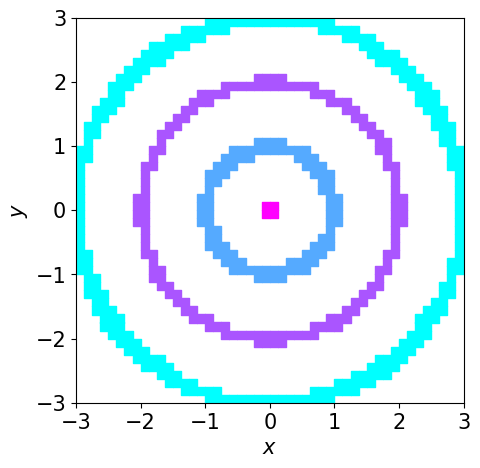

In [25]:
CMGDB.PlotMorseSets(morse_graph, cmap=matplotlib.cm.cool, fig_w=5, fig_h=5)

# Example 4 - Lorenz

In [26]:
# Vector field
def lorenz(t, y):
    sigma, beta, rho = 10.0, 8.0 / 3.0, 28.0
    y1, y2, y3 = y
    dx = sigma * (y2 - y1)
    dy = y1 * (rho - y3) - y2
    dz = y1 * y2 - beta * y3
    return [dx, dy, dz]

# Time tau map
def f(x):
    tau = 0.1
    return tau_map(lorenz, x, tau)

# Define box map for f
def F(rect):
    return CMGDB.BoxMap(f, rect, padding=False)
    # return CMGDB.BoxMap(f, rect, padding=True)

In [27]:
subdiv_min = 16
subdiv_max = 18
subdiv_init = 8
subdiv_limit = 10000
lower_bounds = [-20, -20, 0]
upper_bounds = [20, 20, 50]

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit, lower_bounds, upper_bounds, F)

In [28]:
%%time
# morse_graph, map_graph = CMGDB.ComputeConleyMorseGraph(model)
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: total: 7min 56s
Wall time: 8min 1s


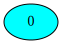

In [29]:
CMGDB.PlotMorseGraph(morse_graph, cmap=matplotlib.cm.cool)

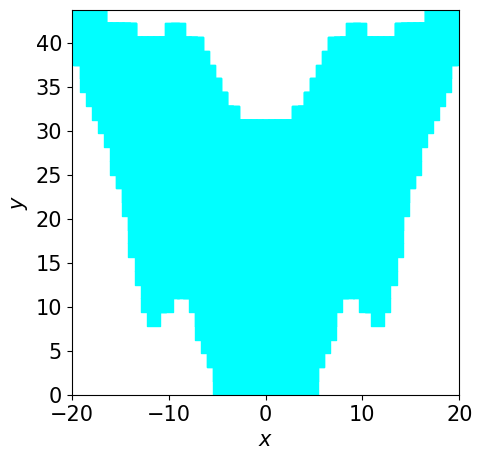

In [30]:
CMGDB.PlotMorseSets(morse_graph, cmap=matplotlib.cm.cool, proj_dims=[0, 2], fig_w=5, fig_h=5)